In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the dataset from the database:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM studentsperformance', con=engine)

# Dispose open connection, as we're only doing a single query:
engine.dispose()

# Print out the first 5 rows of the dataset:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Check for missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1b778790>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1b76eb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1b76eb10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1b77ecd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b778dd0>],
 'means': []}

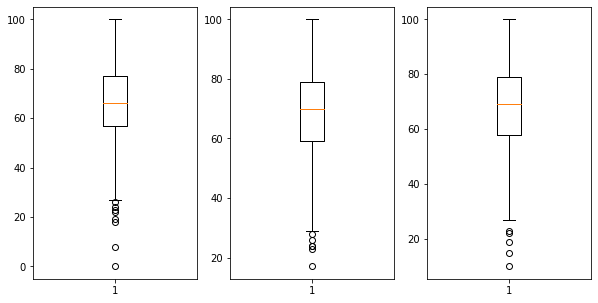

In [4]:
# Plot student scores using boxplot to spot outliners:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.boxplot(df['math score'])

plt.subplot(1,3,2)
plt.boxplot(df['reading score'])

plt.subplot(1,3,3)
plt.boxplot(df['writing score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1b99f690>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1b996a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1b996a10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1b9a7bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b99fcd0>],
 'means': []}

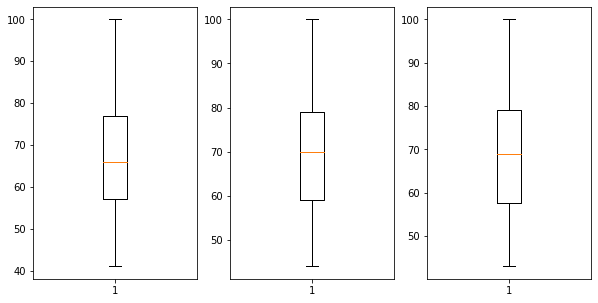

In [5]:
# Use one-way winsorization to eliminate outliners:
df['math score'] = winsorize(df['math score'], (0.05,0), inplace=True)
df['reading score'] = winsorize(df['reading score'], (0.05,0), inplace=True)
df['writing score'] = winsorize(df['writing score'], (0.05,0), inplace=True)
plt.figure(figsize=(10,5))

# Plot variables after winsorization, which eliminated outliners:
plt.subplot(1,3,1)
plt.boxplot(df['math score'])

plt.subplot(1,3,2)
plt.boxplot(df['reading score'])

plt.subplot(1,3,3)
plt.boxplot(df['writing score'])

### 1 - Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

Text(0.5, 1.0, 'Writing score histogram')

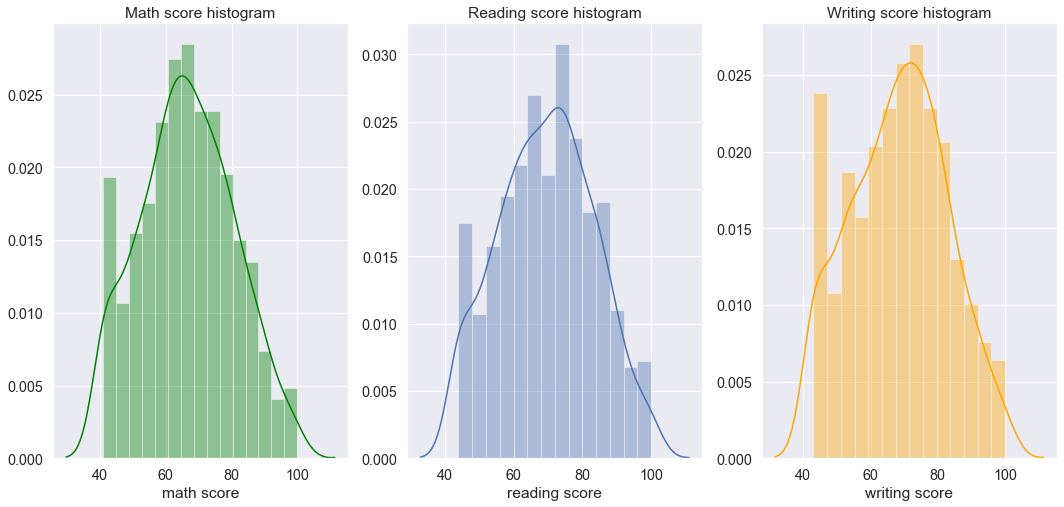

In [6]:
# Visualize score variables using histograms:
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

plt.subplot(1,3,1)
sns.distplot(df['math score'], color='green')
plt.title('Math score histogram')

plt.subplot(1,3,2)
sns.distplot(df['reading score'])
plt.title('Reading score histogram')

plt.subplot(1,3,3)
sns.distplot(df['writing score'], color='orange')
plt.title('Writing score histogram')

In [7]:
# Use jaque-bera and normaltest to test normality distribution of score variables:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(df['math score'])
norm_stats = normaltest(df['math score'])

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df['reading score'])
norm_stats = normaltest(df['reading score'])

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df['writing score'])
norm_stats = normaltest(df['writing score'])

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 17.189436615832474 and p value is 0.0001850807562401302
Normality test statistics is 34.953444762191864 and p value is 2.5701348358866953e-08
Jarque-Bera test statistics is 18.700734054347112 and p value is 8.693350627919649e-05
Normality test statistics is 43.663683050463156 and p value is 3.3002869020511794e-10
Jarque-Bera test statistics is 20.732441898744238 and p value is 3.147802264724664e-05
Normality test statistics is 51.898143450008476 and p value is 5.37602573875543e-12


Observing from the histograms as well as normality test statistics, it looks like score variables are not normally distributed.

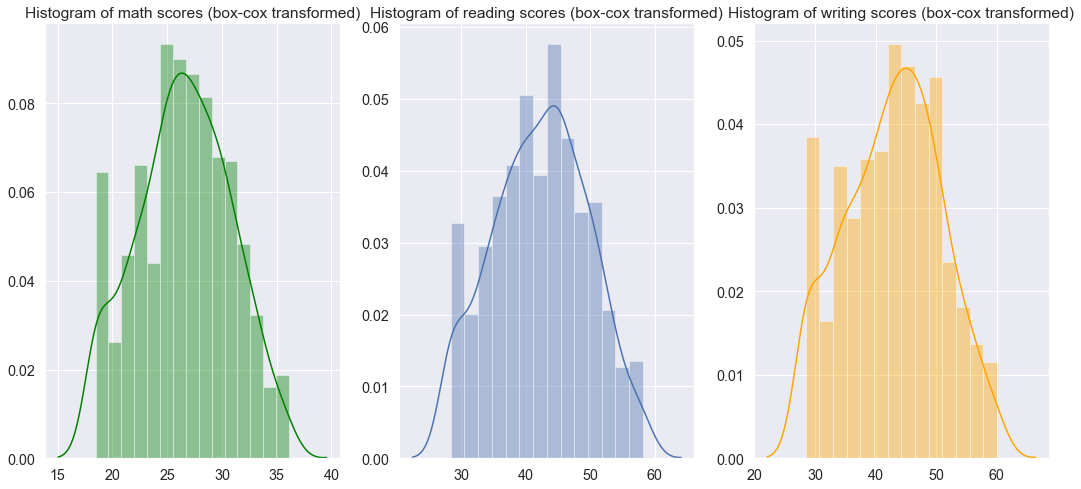

In [8]:
# Apply Box-Cox transformation:
from scipy.stats import boxcox

math_boxcox,_ = boxcox(df['math score'])
reading_boxcox,_ = boxcox(df['reading score'])
writing_boxcox,_ = boxcox(df['writing score'])

# histograms of the box-cox transformed data
plt.figure(figsize=(18,8))

plt.subplot(1, 3, 1)
sns.distplot(math_boxcox, color='green')
plt.title('Histogram of math scores (box-cox transformed)')

plt.subplot(1, 3, 2)
sns.distplot(reading_boxcox)
plt.title('Histogram of reading scores (box-cox transformed)')

plt.subplot(1, 3, 3)
sns.distplot(writing_boxcox, color='orange')
plt.title('Histogram of writing scores (box-cox transformed)')

plt.show()

In [9]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 17.192175549468864 and p value is 0.00018482746776049552
Normality test statistics is 37.786276263445586 and p value is 6.234682809249678e-09
Jarque-Bera test statistics is 19.249003441061685 and p value is 6.608943083208363e-05
Normality test statistics is 45.101118694836515 and p value is 1.6084831346848407e-10
Jarque-Bera test statistics is 21.72694140568642 and p value is 1.9144966882822523e-05
Normality test statistics is 54.961587351166735 and p value is 1.1620985207620959e-12


### 2 - Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [10]:
df['weighted_avg_score'] = round((df['math score'] + df['reading score'] + df['writing score'])/3,2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,weighted_avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


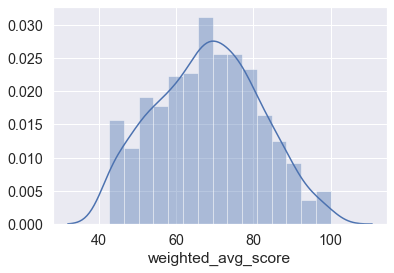

In [11]:
# Visualize the distribution of 'weighted_avg_score':
sns.distplot(df['weighted_avg_score'])

In [12]:
jb_stats = jarque_bera(df['weighted_avg_score'])
norm_stats = normaltest(math_boxcox)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 18.08980001437665 and p value is 0.00011799125962830281
Normality test statistics is 37.786276263445586 and p value is 6.234682809249678e-09


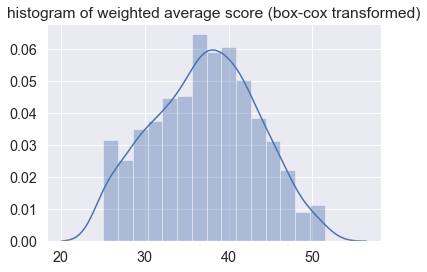

Jarque-Bera test statistics is 18.803015585865094 and p value is 8.259942878208193e-05
Normality test statistics is 43.50364938824371 and p value is 3.5752182949941036e-10


In [13]:
# # Apply Box-Cox transformation:
avgscore_boxcox,_ = boxcox(df['weighted_avg_score'])

sns.distplot(avgscore_boxcox)
plt.title("histogram of weighted average score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(avgscore_boxcox)
norm_stats = normaltest(avgscore_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))